In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/gold.csv')

In [3]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [35]:
df_smoothed=data.rolling(window=7).mean()

In [36]:
df_monthly=data.resample('ME').mean()

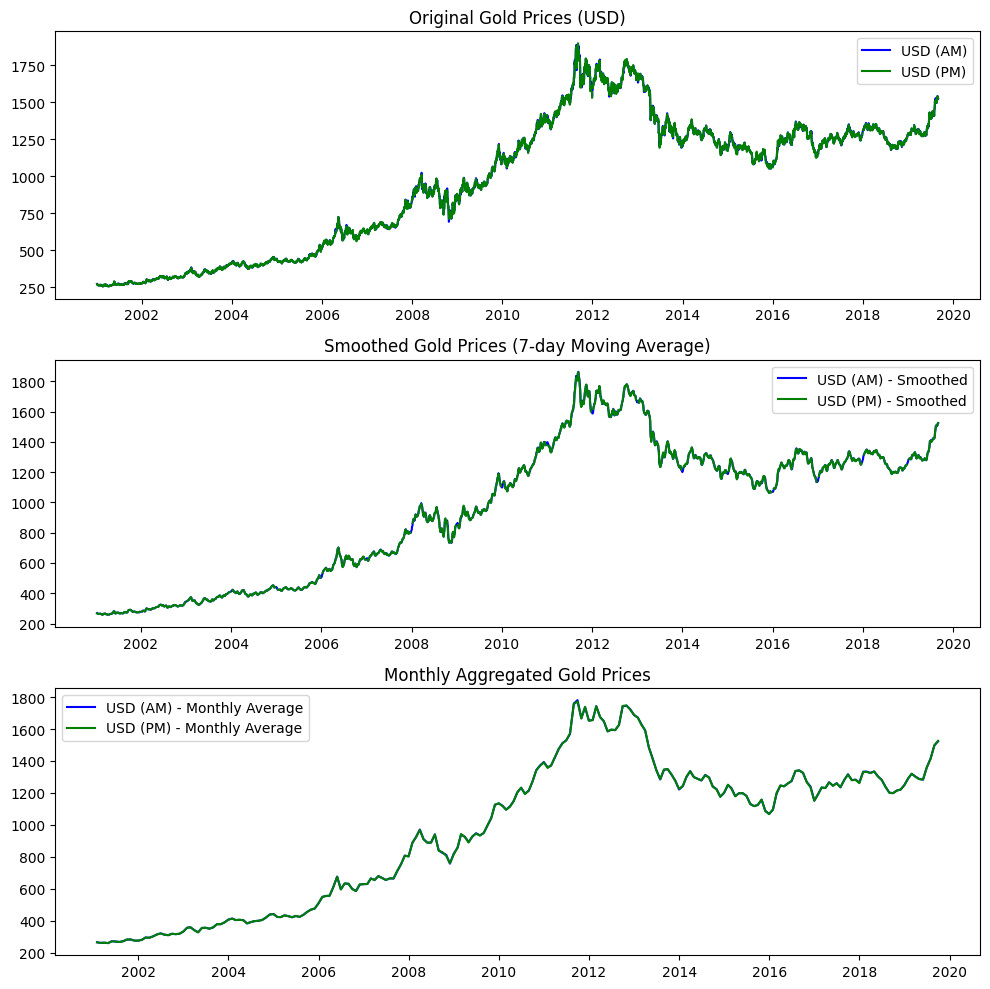

In [38]:
# Re-run the plotting code to ensure proper display
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot original data
axes[0].plot(data.index, data['USD (AM)'], label='USD (AM)', color='blue')
axes[0].plot(data.index, data['USD (PM)'], label='USD (PM)', color='green')
axes[0].set_title('Original Gold Prices (USD)')
axes[0].legend()

# Plot smoothed data
axes[1].plot(df_smoothed.index, df_smoothed['USD (AM)'], label='USD (AM) - Smoothed', color='blue')
axes[1].plot(df_smoothed.index, df_smoothed['USD (PM)'], label='USD (PM) - Smoothed', color='green')
axes[1].set_title('Smoothed Gold Prices (7-day Moving Average)')
axes[1].legend()

# Plot aggregated data
axes[2].plot(df_monthly.index, df_monthly['USD (AM)'], label='USD (AM) - Monthly Average', color='blue')
axes[2].plot(df_monthly.index, df_monthly['USD (PM)'], label='USD (PM) - Monthly Average', color='green')
axes[2].set_title('Monthly Aggregated Gold Prices')
axes[2].legend()

plt.tight_layout()
plt.show()